In [1869]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC  # Support Vector Classifier for SVM
from sklearn.neighbors import KNeighborsClassifier  # for KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score




# 1. Data Loading and Preliminary Analysis

In [1870]:
# Load the dataset
file_path = 'filtered_data_newfeatures.csv'
data = pd.read_csv(file_path, delimiter='\t')

In [1871]:
data.shape

(38333, 195)

In [1872]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Depression_Score,Anxiety_Score,Stress_Score,Depression_Severity,Anxiety_Severity,Stress_Severity
0,3,28,3890,3,25,2122,1,16,1944,3,...,5.0,5.0,1.0,7.0,27,34,40,Severe,Extremely Severe,Extremely Severe
1,3,2,8118,0,36,2890,1,35,4777,2,...,5.0,2.5,1.0,4.0,24,17,27,Severe,Severe,Severe
2,2,7,5784,0,33,4373,3,41,3242,0,...,4.0,2.5,4.5,5.5,39,12,17,Extremely Severe,Moderate,Mild
3,1,23,5081,2,11,6837,1,37,5521,0,...,6.5,7.0,5.0,6.5,16,17,16,Moderate,Severe,Mild
4,1,36,3215,1,13,7731,2,5,4156,3,...,4.0,2.5,2.5,5.0,32,40,29,Extremely Severe,Extremely Severe,Severe


In [1873]:
missing_value_counts = data.isnull().sum()
columns_with_missing_values = missing_value_counts[missing_value_counts > 0]
columns_with_missing_values

country                    2
TIPI1                    473
TIPI2                    555
TIPI3                    575
TIPI4                    453
TIPI5                    504
TIPI6                    480
TIPI7                    587
TIPI8                    645
TIPI9                    416
TIPI10                   543
education                485
urban                    361
gender                    64
engnat                    50
hand                     166
religion                 343
orientation             3039
voted                    310
married                  192
familysize              1074
major                  10823
education_label          485
urban_label              361
gender_label              64
engnat_label              50
hand_label               166
religion_label           343
orientation_label       3039
voted_label              310
married_label            192
Extraversion             635
Agreeableness            734
Conscientiousness        827
Emotional_Stab

In [1874]:
data.drop("major", axis=1, inplace=True)
data.dropna(inplace=True)

In [1875]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Depression_Score,Anxiety_Score,Stress_Score,Depression_Severity,Anxiety_Severity,Stress_Severity
0,3,28,3890,3,25,2122,1,16,1944,3,...,5.0,5.0,1.0,7.0,27,34,40,Severe,Extremely Severe,Extremely Severe
2,2,7,5784,0,33,4373,3,41,3242,0,...,4.0,2.5,4.5,5.5,39,12,17,Extremely Severe,Moderate,Mild
3,1,23,5081,2,11,6837,1,37,5521,0,...,6.5,7.0,5.0,6.5,16,17,16,Moderate,Severe,Mild
4,1,36,3215,1,13,7731,2,5,4156,3,...,4.0,2.5,2.5,5.0,32,40,29,Extremely Severe,Extremely Severe,Severe
5,0,18,6116,0,28,3193,1,2,12542,0,...,7.0,6.0,6.5,4.0,13,6,12,Mild,Normal,Normal


In [1876]:
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Depression_Score,Anxiety_Score,Stress_Score,Depression_Severity,Anxiety_Severity,Stress_Severity
0,3,28,3890,3,25,2122,1,16,1944,3,...,5.0,5.0,1.0,7.0,27,34,40,Severe,Extremely Severe,Extremely Severe
2,2,7,5784,0,33,4373,3,41,3242,0,...,4.0,2.5,4.5,5.5,39,12,17,Extremely Severe,Moderate,Mild
3,1,23,5081,2,11,6837,1,37,5521,0,...,6.5,7.0,5.0,6.5,16,17,16,Moderate,Severe,Mild
4,1,36,3215,1,13,7731,2,5,4156,3,...,4.0,2.5,2.5,5.0,32,40,29,Extremely Severe,Extremely Severe,Severe
5,0,18,6116,0,28,3193,1,2,12542,0,...,7.0,6.0,6.5,4.0,13,6,12,Mild,Normal,Normal


In [1877]:
data.drop(["Depression_Severity", "Anxiety_Severity", "Stress_Severity"], axis=1, inplace=True)

In [1878]:
columns_to_drop = [f'Q{i}{suffix}' for i in range(1, 43) for suffix in [
    'E', 'I', 'A']]
data.drop(columns_to_drop, axis=1, inplace=True)
data.drop(["VCL1", "VCL2", "VCL3", "VCL4", "VCL5", "VCL6", "VCL7", "VCL8", "VCL9",
          "VCL10", "VCL11", "VCL12", "VCL13", "VCL14", "VCL15", "VCL16"], axis=1, inplace=True)
other_columns_to_drop = [
    'urban_label',
    'gender_label', 'engnat_label', 'hand_label', 'religion_label',
    'orientation_label', 'race_label', 'voted_label', 'married_label', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8',
    'TIPI9', 'TIPI10', 'education_label', "country", 'introelapse', 'testelapse', 'surveyelapse', 'mean_response_time',
    'std_deviation_dass', 'source', 'screensize', "uniquenetworklocation"
]
# other_columns_to_drop = [
#     'education', 'urban', 'gender', 'engnat',
#     'hand', 'religion', 'orientation', 'race',
#     'voted', 'married', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10']
data.drop(other_columns_to_drop, axis=1, inplace=True)

In [1879]:
data.columns

Index(['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Emotional_Stability', 'Openness',
       'Depression_Score', 'Anxiety_Score', 'Stress_Score'],
      dtype='object')

In [1880]:
data.head()

,education,urban,gender,engnat,age,hand,religion,orientation,race,voted,married,familysize,Extraversion,Agreeableness,Conscientiousness,Emotional_Stability,Openness,Depression_Score,Anxiety_Score,Stress_Score
0,2.0,3.0,2.0,2.0,16,1.0,12.0,1.0,10,2.0,1.0,2.0,1.0,5.0,5.0,1.0,7.0,27,34,40
2,2.0,3.0,2.0,2.0,17,1.0,4.0,3.0,60,1.0,1.0,3.0,2.0,4.0,2.5,4.5,5.5,39,12,17
3,1.0,3.0,2.0,1.0,13,2.0,4.0,5.0,70,2.0,1.0,5.0,2.5,6.5,7.0,5.0,6.5,16,17,16
4,3.0,2.0,2.0,2.0,19,3.0,10.0,1.0,10,2.0,1.0,4.0,2.5,4.0,2.5,2.5,5.0,32,40,29
5,2.0,3.0,2.0,2.0,20,1.0,4.0,1.0,70,2.0,1.0,4.0,1.5,7.0,6.0,6.5,4.0,13,6,12


In [1881]:
# Apply the function to each of the score columns
data['Depression_Score'] = data['Depression_Score'].apply(lambda x: 0 if x <= 13 else 1)
data['Anxiety_Score'] = data['Anxiety_Score'].apply(lambda x: 0 if x <= 9 else 1)
data['Stress_Score'] = data['Stress_Score'].apply(lambda x: 0 if x <= 18 else 1)

In [1882]:
X_depression = data.drop(['Anxiety_Score', 'Stress_Score'], axis=1)
X_anxiety = data.drop(['Depression_Score', 'Stress_Score'], axis=1)
X_stress = data.drop(['Depression_Score', 'Anxiety_Score'], axis=1)

# 2. Data Splitting

## 2.1.1 Splitting into depression train and test sets

In [1883]:
y_depression = X_depression['Depression_Score']
X_depression = X_depression.drop('Depression_Score', axis=1)

X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(X_depression, y_depression, test_size=0.3, random_state=42)

## 2.1.2 Splitting into stress train and test sets

In [1884]:
y_stress = X_stress['Stress_Score']
X_stress = X_stress.drop('Stress_Score', axis=1)

X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(X_stress, y_stress, test_size=0.3, random_state=42)

## 2.1.1 Splitting into anxiety train and test sets

In [1885]:
y_anxiety = X_anxiety['Anxiety_Score']
X_anxiety = X_anxiety.drop('Anxiety_Score', axis=1)

X_train_anx, X_test_anx, y_train_anx, y_test_anx = train_test_split(X_anxiety, y_anxiety, test_size=0.3, random_state=42)

## 3. Model Training

In this chapter we will train the model on the training data and evaluate it on the test data. We will use the following models:
- Logistic Regression
- Random Forest
- Decision Tree
- Gradient Boosting

## 3.1 Training depression model

In [1886]:
# Identify numerical and categorical columns
numerical_cols = X_depression.select_dtypes(include=['int64', 'float64']).columns

In [1887]:
# Create the preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ])

# Apply the preprocessor to the depression dataset
X_train_dep_processed = preprocessor.fit_transform(X_train_dep)
X_test_dep_processed = preprocessor.transform(X_test_dep)

### 3.1.1 Training depression model with Logistic Regression

Classification Report for Depression (Logistic Regression):
              precision    recall  f1-score   support

           0       0.68      0.46      0.55      3101
           1       0.78      0.89      0.83      6538

    accuracy                           0.76      9639
   macro avg       0.73      0.68      0.69      9639
weighted avg       0.75      0.76      0.74      9639



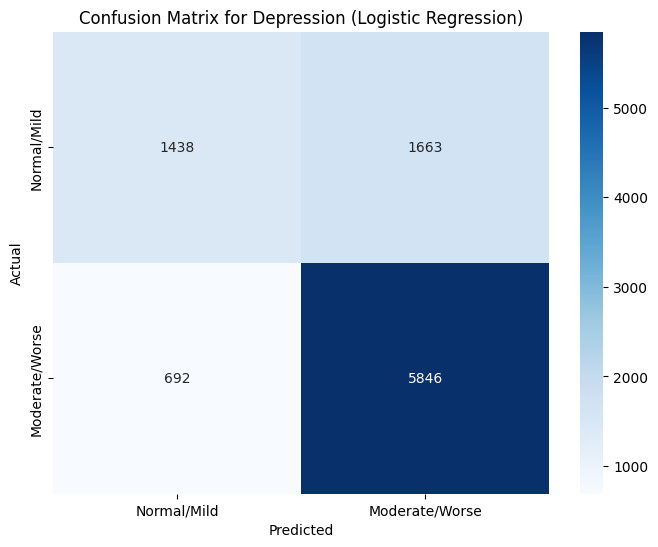

In [1888]:
# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_dep_processed, y_train_dep)

# Predict on the test set
y_pred_dep = log_reg.predict(X_test_dep_processed)

# Evaluate the model
print("Classification Report for Depression (Logistic Regression):")
print(classification_report(y_test_dep, y_pred_dep))

cm = confusion_matrix(y_test_dep, y_pred_dep)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Depression (Logistic Regression)')
plt.show()


### 3.1.2 Training depression model with Random Forest

Classification Report for Depression (Random Forest):
              precision    recall  f1-score   support

           0       0.68      0.47      0.55      3101
           1       0.78      0.90      0.83      6538

    accuracy                           0.76      9639
   macro avg       0.73      0.68      0.69      9639
weighted avg       0.75      0.76      0.74      9639



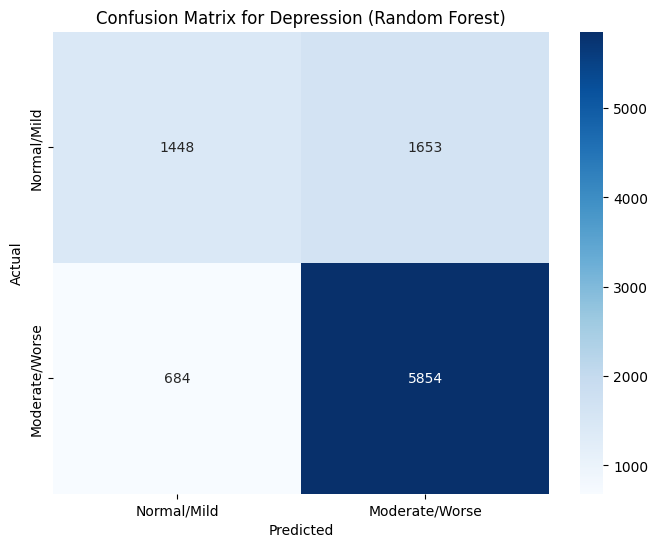

In [1889]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the model
rf.fit(X_train_dep_processed, y_train_dep)

# Predict on the test set
y_pred_dep_rf = rf.predict(X_test_dep_processed)

# Evaluate the model
print("Classification Report for Depression (Random Forest):")
print(classification_report(y_test_dep, y_pred_dep_rf))

cm_rf = confusion_matrix(y_test_dep, y_pred_dep_rf)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Depression (Random Forest)')
plt.show()

### 3.1.3 Training depression model with Decision Tree

Classification Report for Depression (Decision Tree):
              precision    recall  f1-score   support

           0       0.65      0.51      0.57      3101
           1       0.79      0.87      0.83      6538

    accuracy                           0.75      9639
   macro avg       0.72      0.69      0.70      9639
weighted avg       0.74      0.75      0.75      9639



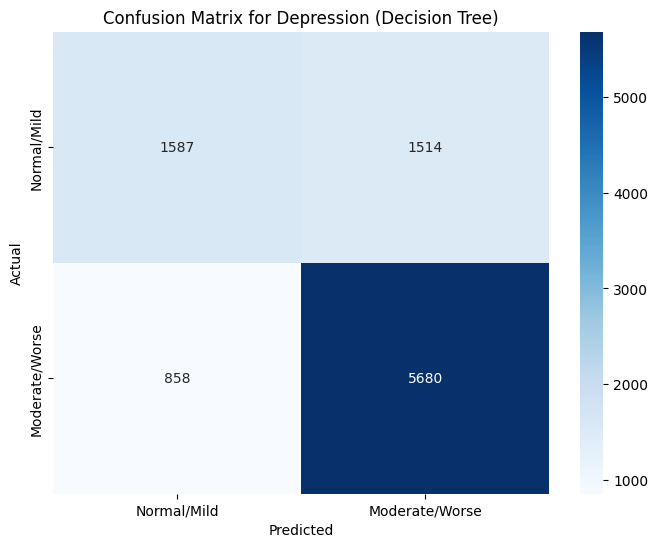

In [1890]:
dt = DecisionTreeClassifier(max_depth=6,random_state=42)

# Regular Decision Tree
dt.fit(X_train_dep_processed, y_train_dep)
y_pred_dep_dt = dt.predict(X_test_dep_processed)

print("Classification Report for Depression (Decision Tree):")
print(classification_report(y_test_dep, y_pred_dep_dt))

cm_dt = confusion_matrix(y_test_dep, y_pred_dep_dt)
# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Depression (Decision Tree)')
plt.show()

### 3.1.3 Training depression model with Gradient Boosting Classifier

Classification Report for Depression (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      3101
           1       0.79      0.88      0.83      6538

    accuracy                           0.76      9639
   macro avg       0.73      0.69      0.70      9639
weighted avg       0.75      0.76      0.75      9639



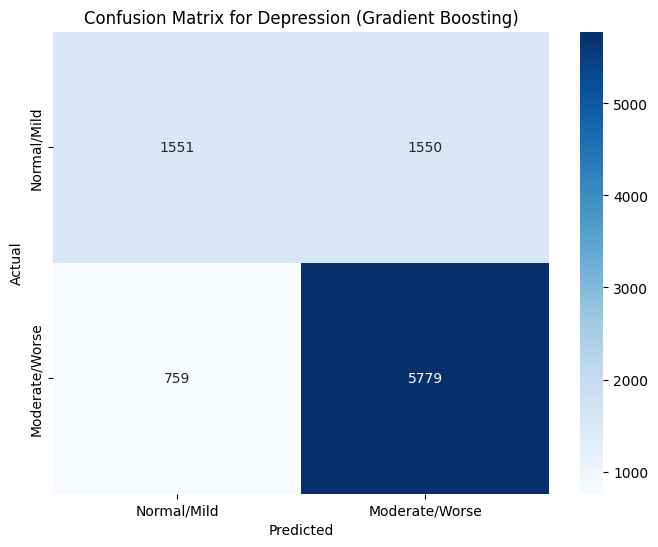

In [1891]:
gb = GradientBoostingClassifier()
gb.fit(X_train_dep_processed, y_train_dep)
y_pred_dep_gb = gb.predict(X_test_dep_processed)

print("Classification Report for Depression (Gradient Boosting):")
print(classification_report(y_test_dep, y_pred_dep_gb))

cm_gbc = confusion_matrix(y_test_dep, y_pred_dep_gb)
# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Depression (Gradient Boosting)')
plt.show()

### 3.1.4 Feature Importance - Gradient Boosting

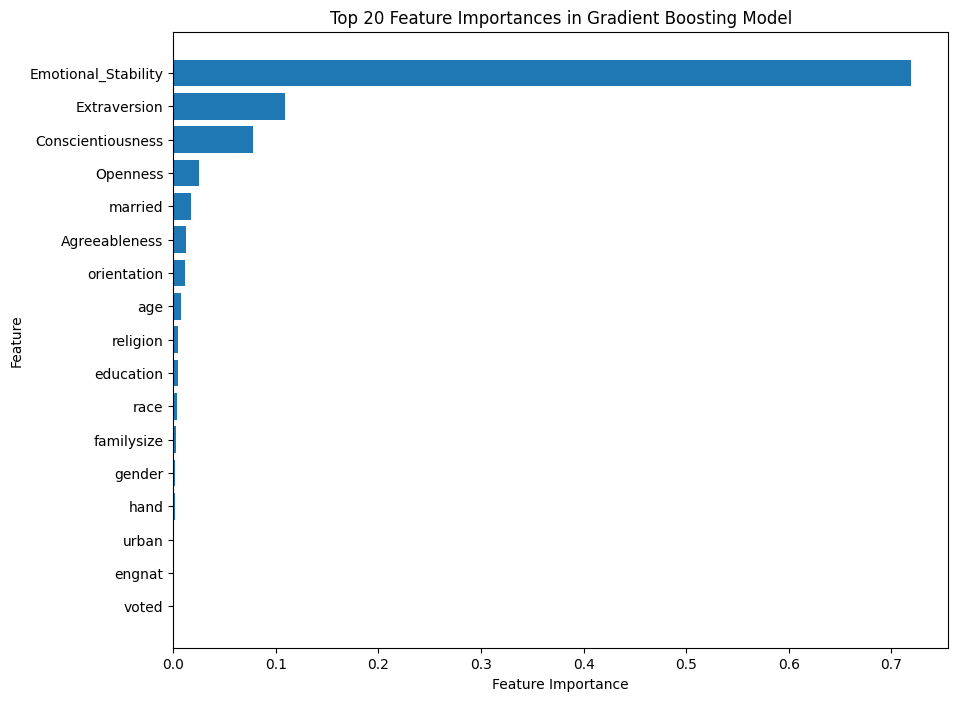

In [1892]:
feature_importances = gb.feature_importances_

feature_names = X_depression.columns  # Replace with your actual DataFrame's column names
importances = gb.feature_importances_

feature_importance_dict = dict(zip(feature_names, importances))
sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


## 3.2 Training stress model

In [1893]:
numerical_cols = X_train_str.select_dtypes(include=['int64', 'float64']).columns

In [1894]:
# Create the preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ])

# Apply the preprocessor to the depression dataset
X_train_str_processed = preprocessor.fit_transform(X_train_str)
X_test_str_processed = preprocessor.transform(X_test_str)

### 3.2.1 Training stress model with Logistic Regression

Classification Report for Stress (Logistic Regression):
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      4088
           1       0.76      0.83      0.79      5551

    accuracy                           0.75      9639
   macro avg       0.75      0.73      0.74      9639
weighted avg       0.75      0.75      0.75      9639



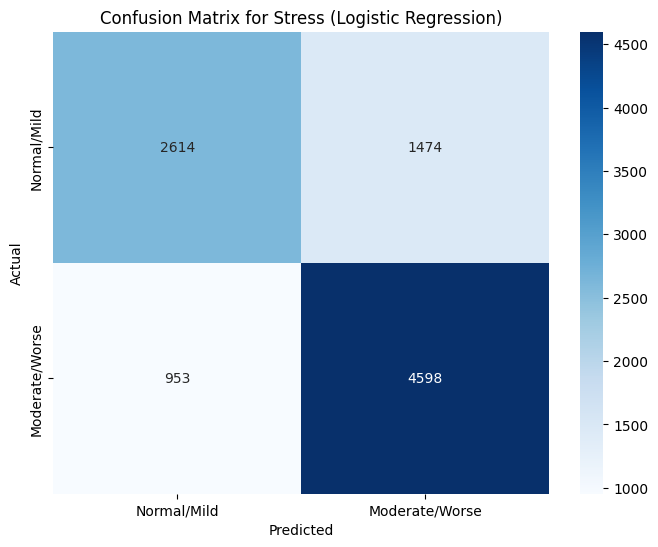

In [1895]:
# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_str_processed, y_train_str)

# Predict on the test set
y_pred_str = log_reg.predict(X_test_str_processed)

# Evaluate the model
print("Classification Report for Stress (Logistic Regression):")
print(classification_report(y_test_str, y_pred_str))

cm = confusion_matrix(y_test_str, y_pred_str)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Stress (Logistic Regression)')
plt.show()


### 3.2.2 Training stress model with Random Forest

Classification Report for Stress (Random Forest):
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      4088
           1       0.76      0.80      0.78      5551

    accuracy                           0.74      9639
   macro avg       0.74      0.73      0.73      9639
weighted avg       0.74      0.74      0.74      9639



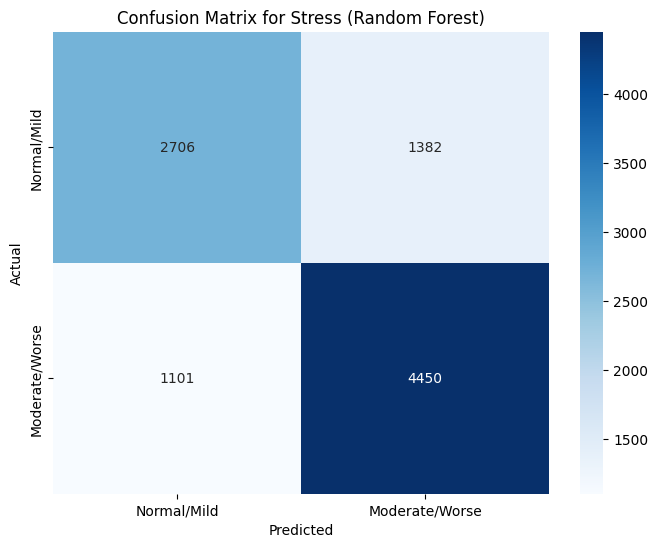

In [1896]:
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_str_processed, y_train_str)

# Predict on the test set
y_pred_str_rf = rf.predict(X_test_str_processed)

# Evaluate the model
print("Classification Report for Stress (Random Forest):")
print(classification_report(y_test_str, y_pred_str_rf))

cm_rf = confusion_matrix(y_test_str, y_pred_str_rf)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Stress (Random Forest)')
plt.show()

### 3.2.3 Training stress model with Decision Tree

Classification Report for Stress (Decision Tree):
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      4088
           1       0.74      0.85      0.79      5551

    accuracy                           0.74      9639
   macro avg       0.74      0.73      0.73      9639
weighted avg       0.74      0.74      0.74      9639



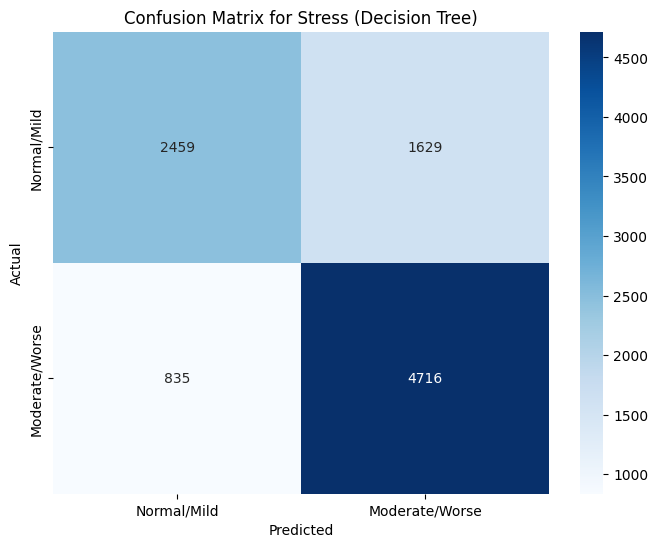

In [1897]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train_str_processed, y_train_str)
y_pred_str_dt = dt.predict(X_test_str_processed)

print("Classification Report for Stress (Decision Tree):")
print(classification_report(y_test_str, y_pred_str_dt))

cm_dt = confusion_matrix(y_test_str, y_pred_str_dt)
# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Stress (Decision Tree)')
plt.show()

### 3.2.3 Training stress model with Gradient Boosting Classifier

Classification Report for Stress (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      4088
           1       0.76      0.81      0.79      5551

    accuracy                           0.75      9639
   macro avg       0.74      0.74      0.74      9639
weighted avg       0.75      0.75      0.75      9639



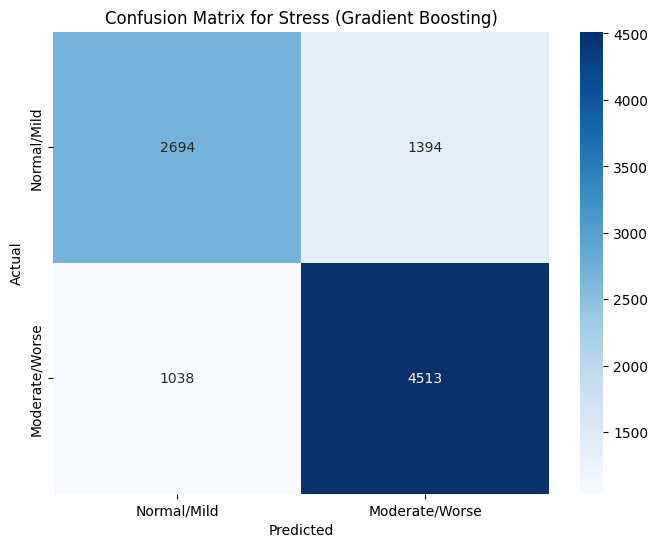

In [1898]:
gb = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.1)
gb.fit(X_train_str_processed, y_train_str)
y_pred_str_gb = gb.predict(X_test_str_processed)

print("Classification Report for Stress (Gradient Boosting):")
print(classification_report(y_test_str, y_pred_str_gb))

cm_gbc = confusion_matrix(y_test_str, y_pred_str_gb)
# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Stress (Gradient Boosting)')
plt.show()

### 3.2.4 Feature Importance - Gradient Boosting

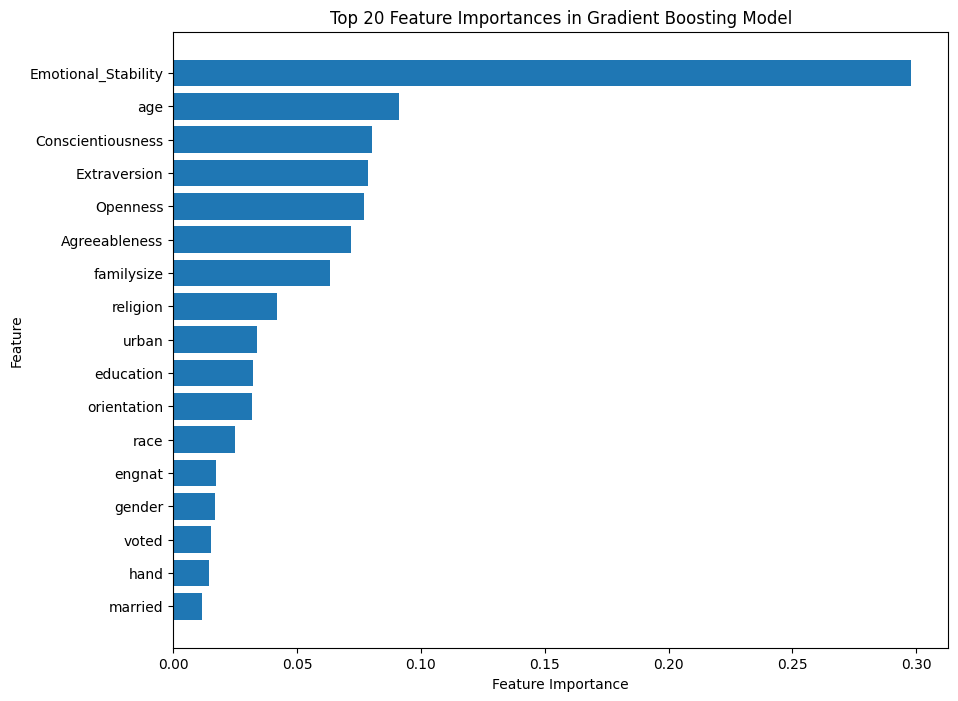

In [1899]:
feature_importances = gb.feature_importances_

feature_names = X_stress.columns  # Replace with your actual DataFrame's column names
importances = rf.feature_importances_

feature_importance_dict = dict(zip(feature_names, importances))

sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)



# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()


## 3.3 Training anxiety model

In [1900]:
numerical_cols = X_train_anx.select_dtypes(include=['int64', 'float64']).columns

In [1901]:
# Create the preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ])

# Apply the preprocessor to the depression dataset
X_train_anx_processed = preprocessor.fit_transform(X_train_anx)
X_test_anx_processed = preprocessor.transform(X_test_anx)

### 3.2.1 Training anxiety model with Logistic Regression

Classification Report for Anxiety (Logistic Regression):
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      3024
           1       0.79      0.89      0.84      6615

    accuracy                           0.77      9639
   macro avg       0.73      0.69      0.70      9639
weighted avg       0.76      0.77      0.75      9639



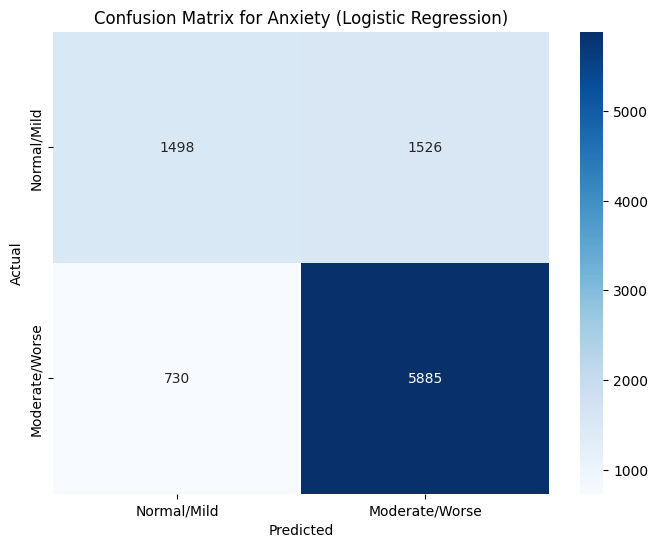

In [1902]:
# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train_anx_processed, y_train_anx)

# Predict on the test set
y_pred_anx = log_reg.predict(X_test_anx_processed)

# Evaluate the model
print("Classification Report for Anxiety (Logistic Regression):")
print(classification_report(y_test_anx, y_pred_anx))

cm = confusion_matrix(y_test_anx, y_pred_anx)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Anxiety (Logistic Regression)')
plt.show()


### 3.2.2 Training anxiety model with Random Forest

Classification Report for Anxiety (Random Forest):
              precision    recall  f1-score   support

           0       0.65      0.52      0.58      3024
           1       0.80      0.87      0.83      6615

    accuracy                           0.76      9639
   macro avg       0.72      0.69      0.70      9639
weighted avg       0.75      0.76      0.75      9639



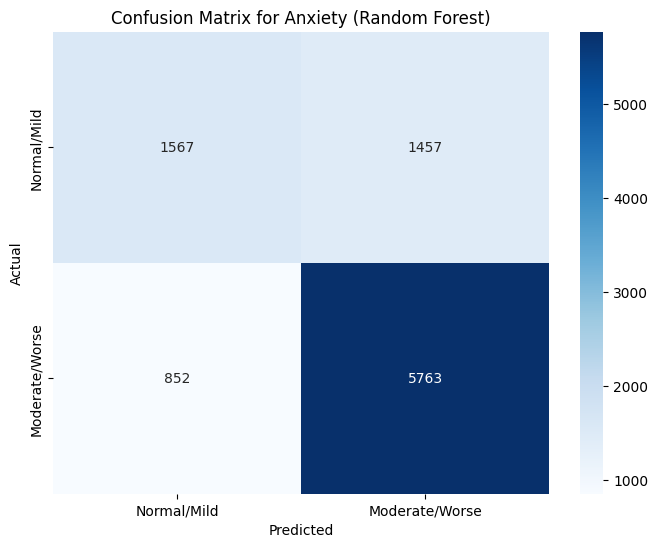

In [1903]:
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train_anx_processed, y_train_anx)

# Predict on the test set
y_pred_anx_rf = rf.predict(X_test_anx_processed)

# Evaluate the model
print("Classification Report for Anxiety (Random Forest):")
print(classification_report(y_test_anx, y_pred_anx_rf))

cm_rf = confusion_matrix(y_test_anx, y_pred_anx_rf)

# Plotting the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Anxiety (Random Forest)')
plt.show()

### 3.2.3 Training anxiety model with Decision Tree

Classification Report for Anxiety (Decision Tree):
              precision    recall  f1-score   support

           0       0.68      0.43      0.53      3024
           1       0.78      0.91      0.84      6615

    accuracy                           0.76      9639
   macro avg       0.73      0.67      0.68      9639
weighted avg       0.75      0.76      0.74      9639



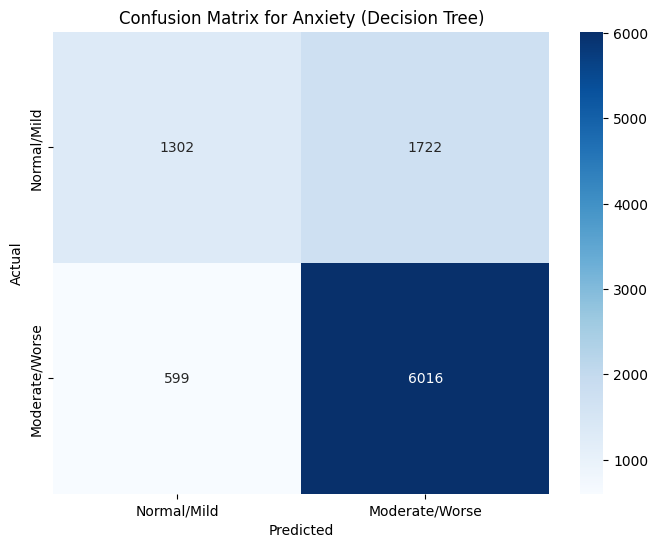

In [1904]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train_anx_processed, y_train_anx)
y_pred_anx_dt = dt.predict(X_test_anx_processed)

print("Classification Report for Anxiety (Decision Tree):")
print(classification_report(y_test_anx, y_pred_anx_dt))

cm_dt = confusion_matrix(y_test_anx, y_pred_anx_dt)
# Plotting the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Anxiety (Decision Tree)')
plt.show()

### 3.2.3 Training anxiety model with Gradient Boosting Classifier

Classification Report for Anxiety (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      3024
           1       0.80      0.88      0.84      6615

    accuracy                           0.77      9639
   macro avg       0.73      0.70      0.71      9639
weighted avg       0.76      0.77      0.76      9639



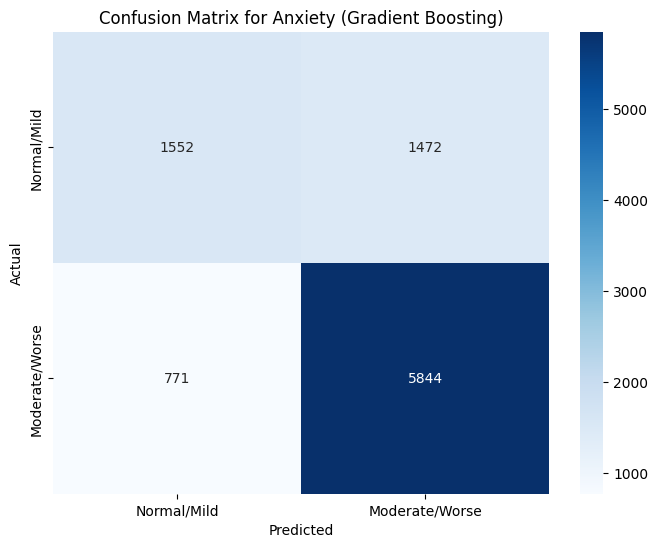

In [1905]:
gb = GradientBoostingClassifier()
gb.fit(X_train_anx_processed, y_train_anx)
y_pred_anx_gb = gb.predict(X_test_anx_processed)

print("Classification Report for Anxiety (Gradient Boosting):")
print(classification_report(y_test_anx, y_pred_anx_gb))

cm_gbc = confusion_matrix(y_test_anx, y_pred_anx_gb)

# Plotting the confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal/Mild', 'Moderate/Worse'], yticklabels=['Normal/Mild', 'Moderate/Worse'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Anxiety (Gradient Boosting)')
plt.show()

### 3.3.4 Feature Importance - Gradient Boosting

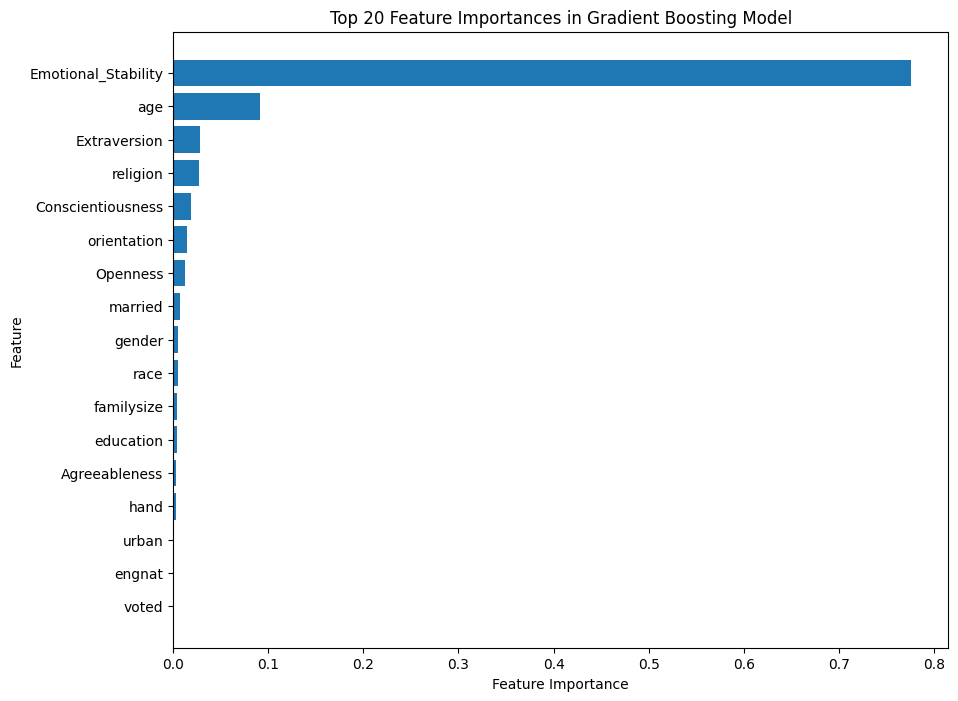

In [1906]:
feature_importances = gb.feature_importances_

feature_names = X_train_anx.columns  # Replace with your actual DataFrame's column names
importances = gb.feature_importances_

feature_importance_dict = dict(zip(feature_names, importances))

sorted_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)


# Plotting
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.yticks(range(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances in Gradient Boosting Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()
